**This notebook covers use of sigmoid function and logistic regression for classification ml use cases**

In [51]:
# let's start by importing libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier 
from sklearn.preprocessing import StandardScaler 

**We start off using the linear regression prediction function fwb = wx + b however, classification results are binary and we need to ensure that our prediction stays within 0 and 1 boundaries inclusive. So we are going to use the logistical regression that uses sigmoid function**

**Sigmoid function is denoted by g and uses output of linear regression (z) to compute the logistical regression**

z = 1/1+e^-(fwb)

In [37]:
# numpy has a built in function exp to calculate the exponential value like e^z

input_array = np.array([1,2,3])
exp_array = np.exp(input_array)

print(f"Input array is: {input_array}")
print(f"Exp array is: {exp_array}")

# let's try when the input is a single number

input = -10
exp = np.exp(input)

print(f"Input is: {input}")
print(f"Exp is: {exp}")

Input array is: [1 2 3]
Exp array is: [ 2.718  7.389 20.086]
Input is: -10
Exp is: 4.5399929762484854e-05


In [38]:
# now let's define the implementation of sigmoid function in python

def sigmoid_fn(z):

    g = 1/(1+np.exp(-z))

    return g

In [39]:
# now let's compute output of the sigmoid function with some test data

z_tmp = np.arange(-10,11)

y = sigmoid_fn(z_tmp)

np.set_printoptions(precision=3)

print(f"Input data is: {z_tmp}\n")
print(f"Output data is: {y}\n")

# using _c function to concatenate arrays along columns

print(f"Input and output data is : \n {np.c_[z_tmp,y]}")

Input data is: [-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]

Output data is: [4.540e-05 1.234e-04 3.354e-04 9.111e-04 2.473e-03 6.693e-03 1.799e-02
 4.743e-02 1.192e-01 2.689e-01 5.000e-01 7.311e-01 8.808e-01 9.526e-01
 9.820e-01 9.933e-01 9.975e-01 9.991e-01 9.997e-01 9.999e-01 1.000e+00]

Input and output data is : 
 [[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]
 [ 1.000e+01  1.000e+00]]


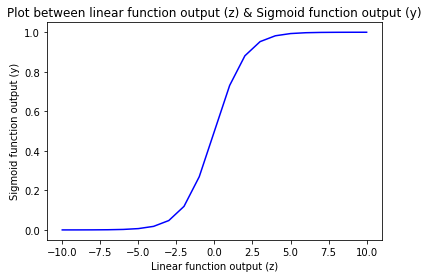

In [40]:
# now let's plot these values on a graph

plt.plot(z_tmp, y, marker="", color="b")
plt.title("Plot between linear function output (z) & Sigmoid function output (y)")
plt.xlabel("Linear function output (z)")
plt.ylabel("Sigmoid function output (y)")
plt.show()

In [41]:
# now let's evaluate some individual examples to draw relation between increasing and decreasing z values
# if we predicted values from linear regression as a positive number then the exponential function would negate it and compute a very small exponential result that will produce a sigmoid function output closer to 1
# if we predicted values from linear regression as a negative number then the exponential function would make it positive and compute a very large exponential result that will produce a very small close to 0 output

inp_tmp = -100
exp_tmp = np.exp(-inp_tmp)
y_tmp = sigmoid_fn(inp_tmp)

print(f"Input is: {inp_tmp}\n")
print(f"Exp is: {exp_tmp:0.6f}\n")
print(f"Sigmoid fn is: {y_tmp:0.6f}\n")

Input is: -100

Exp is: 26881171418161356094253400435962903554686976.000000

Sigmoid fn is: 0.000000



X train data is: [[-1.464]
 [-0.878]
 [-0.293]
 [ 0.293]
 [ 0.878]
 [ 1.464]]
Y predict value is: [0 0 1 1 1]
Y predict value from sigmoid fn is: [0.5   0.5   0.731 0.731 0.731]


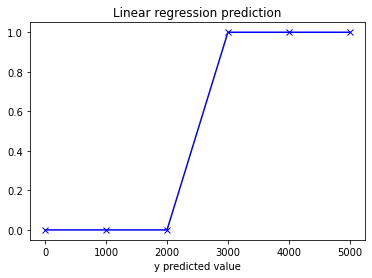

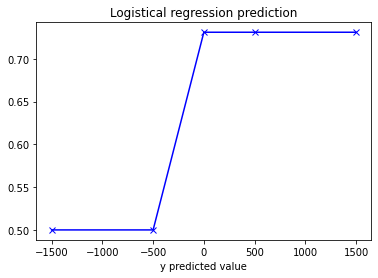

In [75]:
# now let's take some training data and compute the logistical regression based on that

x_train = np.array([0., 1000, 2000, 3000, 4000, 5000])
y_train = np.array([0,  0, 0, 1, 1, 1])

scaler = StandardScaler()

X_train = scaler.fit_transform(x_train.reshape(-1,1))

clf = SGDClassifier(max_iter=1000, alpha=0.0001)

clf.fit(X_train, y_train)

X_test = np.array([-1500, -500, 0, 500, 1500])

y_pred = clf.predict(X_test.reshape(-1,1))

print(f"X train data is: {X_train}")
print(f"Y predict value is: {y_pred}")

# now let's compute the sigmoid function for the predicted y

y_pred_sig = sigmoid_fn(y_pred)
print(f"Y predict value from sigmoid fn is: {y_pred_sig}")

# let's create two plots one from linear regression and one from sigmoid function

plt.plot(x_train, y_train, marker="x", color="b")
plt.xlabel("x training data")
plt.xlabel("y predicted value")
plt.title("Linear regression prediction")
plt.show() 

plt.plot(X_test, y_pred_sig, marker="x", color="b")
plt.xlabel("x training data")
plt.xlabel("y predicted value")
plt.title("Logistical regression prediction")
plt.show()